In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

Text(0, 0.5, 'Gain')

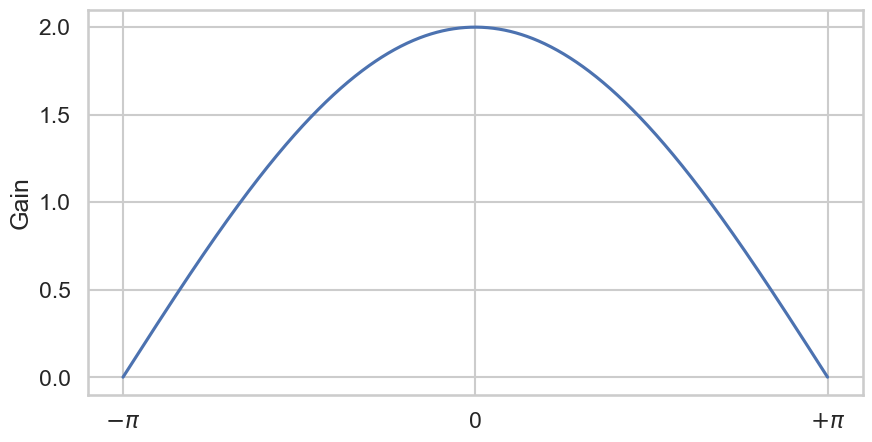

In [3]:
t = np.linspace(-np.pi, np.pi, 1000)
gain = lambda x: 2 * np.cos(x/2)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, gain(t), label=r'$y(t)$')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', r'0', r'$+\pi$']);
ax.set_ylabel('Gain')

Text(0.5, 0, '$\\omega$')

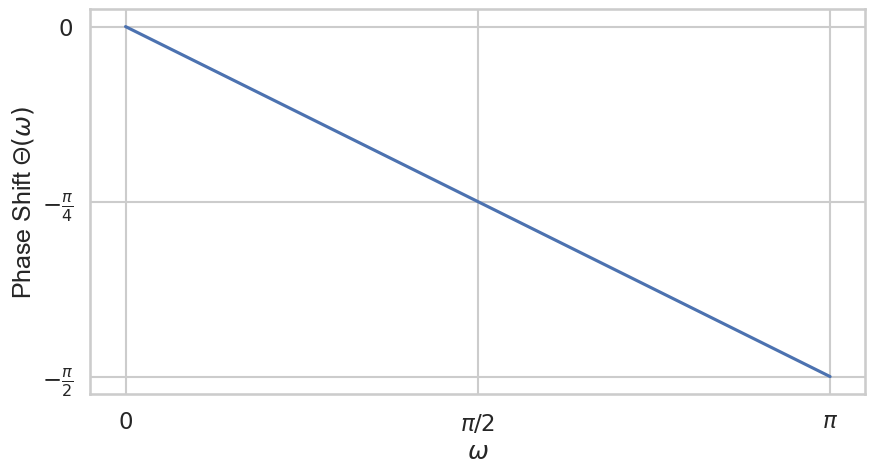

In [4]:
t = np.linspace(0, np.pi, 1000)
phase = lambda x: -x/2

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, phase(t), label=r'$y(t)$')
ax.set_xticks([0, np.pi/2, np.pi])
ax.set_yticks([-np.pi/2, -np.pi/4, 0])
ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$']);
ax.set_yticklabels([r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', r'$0$']);
ax.set_ylabel(r'Phase Shift $\mathcal{\Theta}(\omega)$')
ax.set_xlabel(r'$\omega$')

# Brick Wall

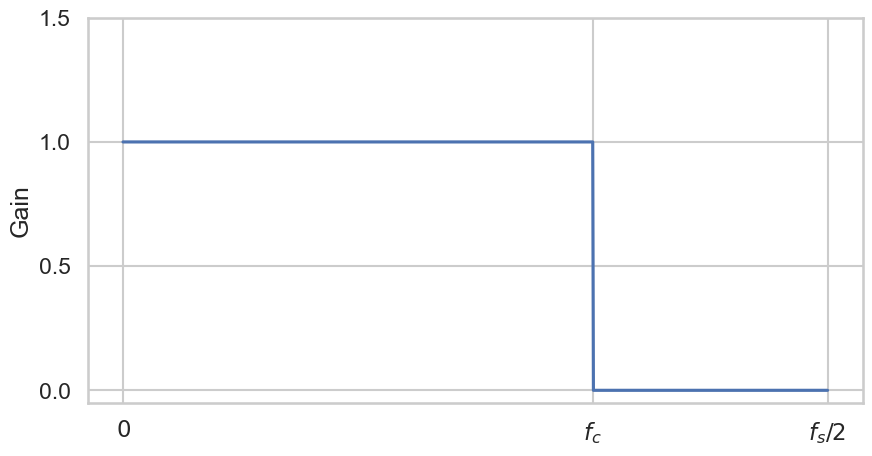

In [5]:
f_s = 3
f_c = 2
t = np.linspace(0, f_s, 1000)
gain = lambda x: 1 if x <= f_c else 0
y = [gain(val) for val in t]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, y, label=r'$y(t)$')
ax.set_xticks([0, f_c, f_s])
ax.set_xticklabels([r'$0$', r'$f_c$', r'$f_s/2$'])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_ylabel('Gain');

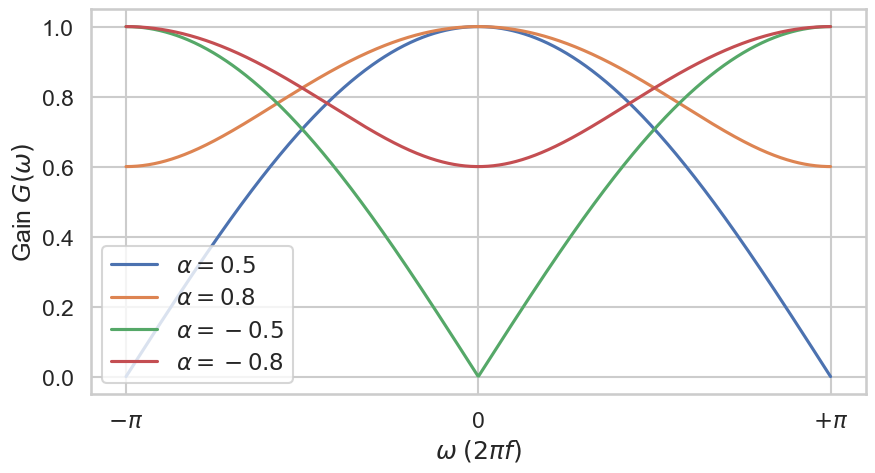

In [142]:
t = np.linspace(-np.pi, np.pi, 1000)
gain = lambda x, alpha: np.abs((1-np.abs(alpha)) * (1-(alpha/(np.abs(alpha) -1))*np.exp(-1j*x)))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, np.abs(gain(t, 0.5)), label=r'$\alpha = 0.5$')
ax.plot(t, np.abs(gain(t, 0.8)), label=r'$\alpha = 0.8$')
ax.plot(t, np.abs(gain(t, -0.5)), label=r'$\alpha = -0.5$')
ax.plot(t, np.abs(gain(t, -0.8)), label=r'$\alpha = -0.8$')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', r'0', r'$+\pi$']);
ax.set_ylabel(r'Gain $G(\omega)$')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.legend();

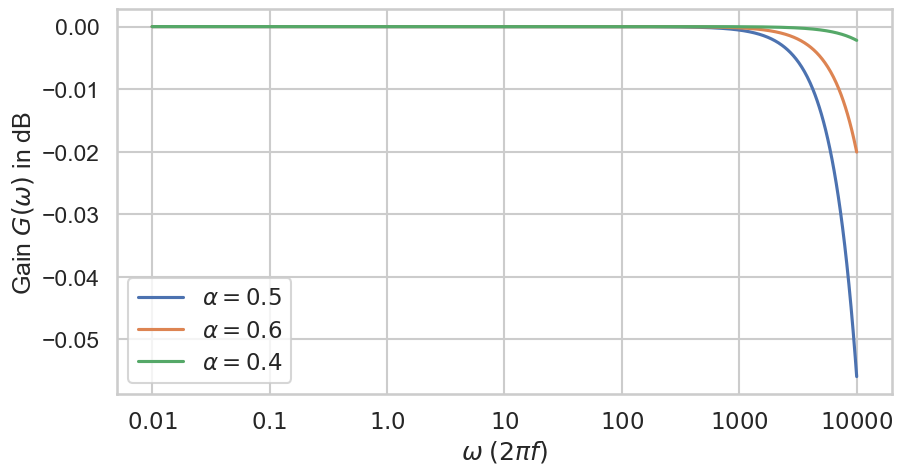

In [146]:
t = np.logspace(start=-2, stop=4, base=10, num=1000)
f_s = 44_100
T = 1.0 / f_s
gain = lambda x, alpha: np.abs((1-np.abs(alpha)) * (1-(alpha/(np.abs(alpha) -1))*np.exp(-1j*x*T)))
#gain = lambda x, alpha: (1-np.abs(alpha)) / np.sqrt((1 - alpha * np.cos(x * T))**2.0 + (alpha * np.sin(x * T))**2.0)
db = lambda x, alpha: 20 * np.log10(gain(x, alpha))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, db(t, 0.5), label=r'$\alpha = 0.5$')
ax.plot(t, db(t, 0.1), label=r'$\alpha = 0.6$')
ax.plot(t, db(t, 0.99), label=r'$\alpha = 0.4$')
#ax.plot(t, db(t, 0.8), label=r'$\alpha = 0.8$')
#ax.plot(t, db(t, -0.5), label=r'$\alpha = -0.5$')
#ax.plot(t, db(t, -0.8), label=r'$\alpha = -0.8$')
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 10, 100, 1000, 10000])
ax.set_xticklabels([r'$0.01$', r'$0.1$', r'$1.0$', r'$10$', r'$100$', r'$1000$', r'$10000$'])
ax.set_ylabel(r'Gain $G(\omega)$ in dB')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.legend();

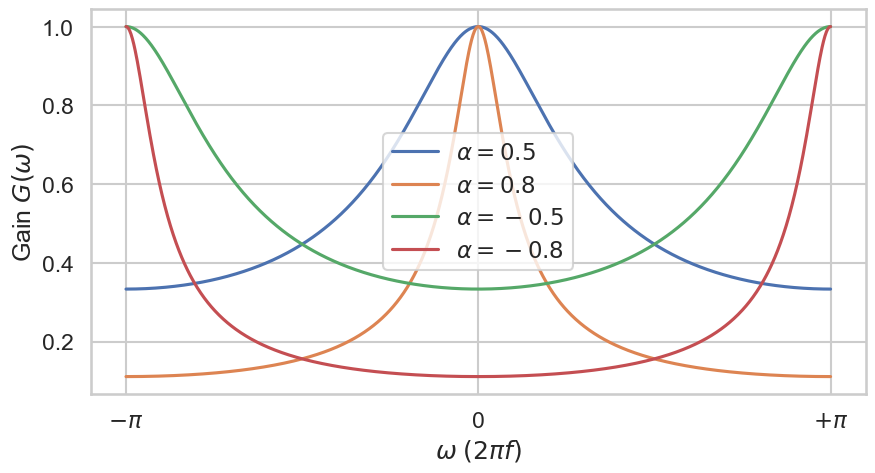

In [101]:
t = np.linspace(-np.pi, np.pi, 1000)
gain = lambda x, alpha: (1-np.abs(alpha)) / (1-alpha*np.exp(-1j*x))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, np.abs(gain(t, 0.5)), label=r'$\alpha = 0.5$')
ax.plot(t, np.abs(gain(t, 0.8)), label=r'$\alpha = 0.8$')
ax.plot(t, np.abs(gain(t, -0.5)), label=r'$\alpha = -0.5$')
ax.plot(t, np.abs(gain(t, -0.8)), label=r'$\alpha = -0.8$')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', r'0', r'$+\pi$']);
ax.set_ylabel(r'Gain $G(\omega)$')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.legend();

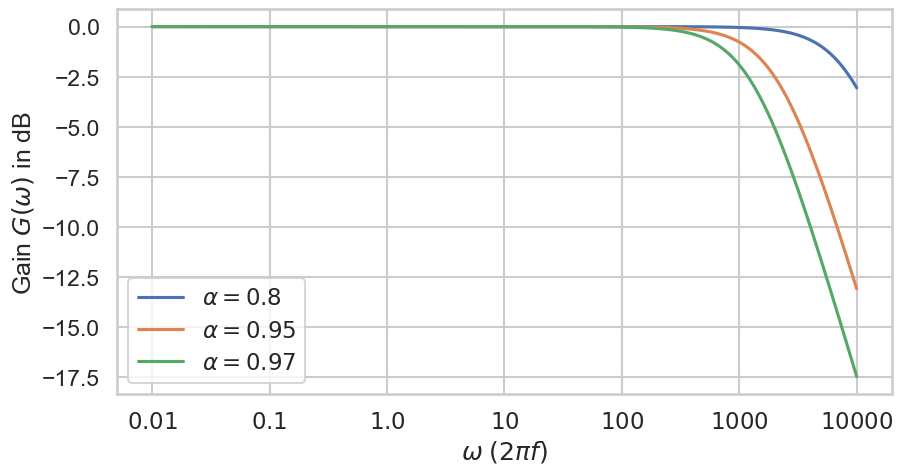

In [121]:
t = np.logspace(start=-2, stop=4, base=10, num=1000)
f_s = 44_100
T = 1.0 / f_s
gain = lambda x, alpha: np.abs((1-np.abs(alpha)) / (1-alpha*np.exp(-1j*x*T)))
#gain = lambda x, alpha: (1-np.abs(alpha)) / np.sqrt((1 - alpha * np.cos(x * T))**2.0 + (alpha * np.sin(x * T))**2.0)
db = lambda x, alpha: 20 * np.log10(gain(x, alpha))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, db(t, 0.8), label=r'$\alpha = 0.8$')
ax.plot(t, db(t, 0.95), label=r'$\alpha = 0.95$')
ax.plot(t, db(t, 0.97), label=r'$\alpha = 0.97$')
#ax.plot(t, db(t, 0.8), label=r'$\alpha = 0.8$')
#ax.plot(t, db(t, -0.5), label=r'$\alpha = -0.5$')
#ax.plot(t, db(t, -0.8), label=r'$\alpha = -0.8$')
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 10, 100, 1000, 10000])
ax.set_xticklabels([r'$0.01$', r'$0.1$', r'$1.0$', r'$10$', r'$100$', r'$1000$', r'$10000$'])
ax.set_ylabel(r'Gain $G(\omega)$ in dB')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.legend();

# Butterworth filter

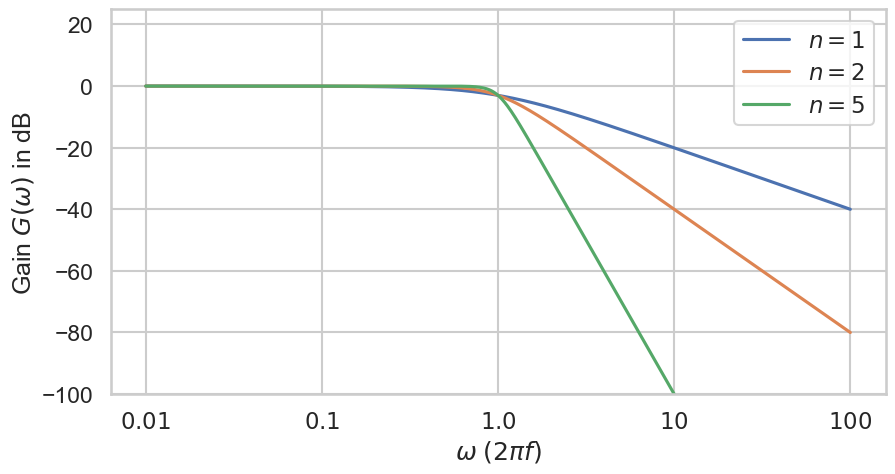

In [111]:
omega = np.logspace(start=-2, stop=2, base=10, num=1000)
gain = lambda x, n: 1 / (np.sqrt(1+np.power(x*1.0, 2*n)))
db = lambda x, n: 20 * np.log10(gain(x, n))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(omega, db(omega, 1), label=r'$n = 1$')
ax.plot(omega, db(omega, 2), label=r'$n = 2$')
ax.plot(omega, db(omega, 5), label=r'$n = 5$')
ax.set_xscale('log')
ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels([r'$0.01$', r'$0.1$', r'$1.0$', r'$10$', r'$100$'])
ax.set_ylabel(r'Gain $G(\omega)$ in dB')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.set_ylim(-100, 25)
ax.legend();

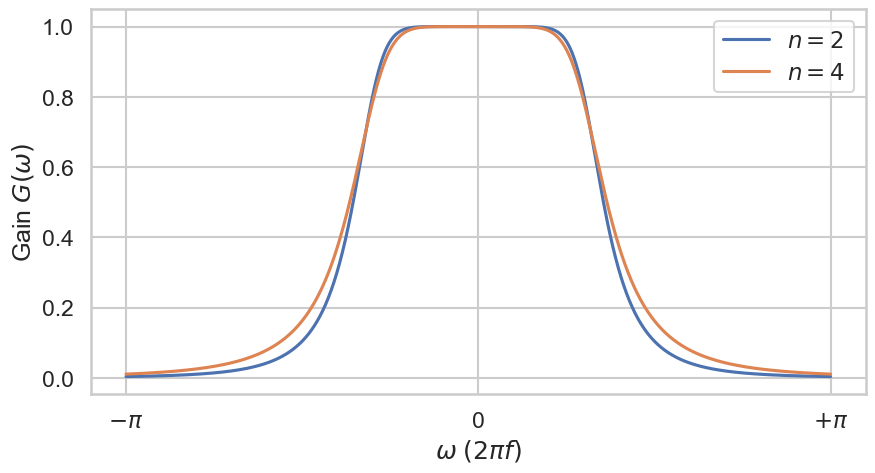

In [160]:
omega_c = 1
omega = np.linspace(-np.pi, np.pi, 1000)
gain = lambda x, n: 1 / (np.sqrt(1+np.power(x / omega_c, 2*n)))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(omega, np.abs(gain(omega, 2)), label=r'$n = 2$')
ax.plot(omega, np.abs(gain(omega, 4)), label=r'$n = 4$')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', r'0', r'$+\pi$']);
ax.set_ylabel(r'Gain $G(\omega)$')
ax.set_xlabel(r'$\omega$ $(2\pi f)$')
ax.legend();

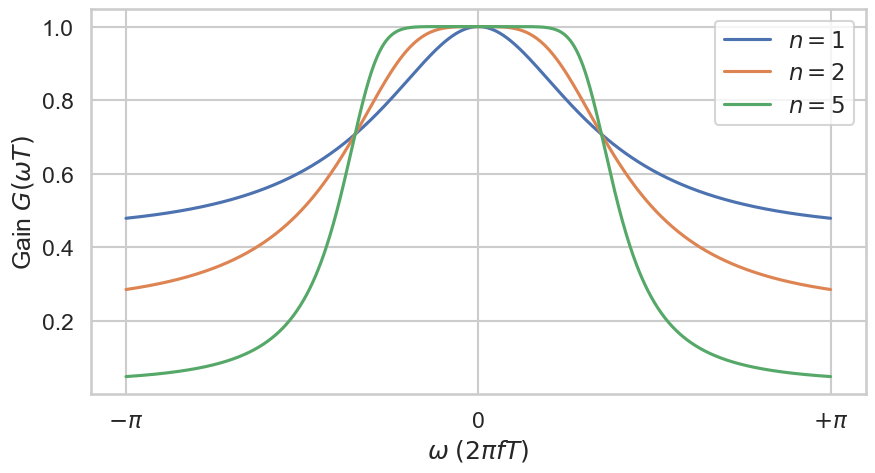

In [163]:
omega = np.linspace(-np.pi, np.pi, 1000)
gain = lambda x, n: 1 / (np.sqrt(1+np.power(2 * (1-np.exp(-x * 1)) / (1+np.exp(-x * 1)), 2*n)))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(omega, np.abs(gain(omega, 1)), label=r'$n = 1$')
ax.plot(omega, np.abs(gain(omega, 2)), label=r'$n = 2$')
ax.plot(omega, np.abs(gain(omega, 5)), label=r'$n = 5$')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', r'0', r'$+\pi$']);
ax.set_ylabel(r'Gain $G(\omega T)$')
ax.set_xlabel(r'$\omega$ $(2\pi f T)$')
ax.legend();